In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/공부/code/diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info() #인코딩 필요 x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [9]:
X= df.iloc[:,:-1] #outcome 빼고
y= df.iloc[:,-1] #outcome

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=156, stratify = y)

In [11]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [12]:
lr_clf=LogisticRegression(solver='liblinear')

In [13]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)

    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [14]:
X= df.iloc[:,:-1] #outcome 빼고
y= df.iloc[:,-1] #outcome
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=156, stratify = y)

lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test , pred)
# print("로지스틱: {:.3f}".format(accuracy_score(y_test,pred)))

오차행렬:
 [[87 13]
 [22 32]]

정확도: 0.7727
정밀도: 0.7111
재현율: 0.5926
F1: 0.6465
AUC: 0.7313


In [15]:
def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')

    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))

    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

### 재현율에 조금 더 초점을 맞추기

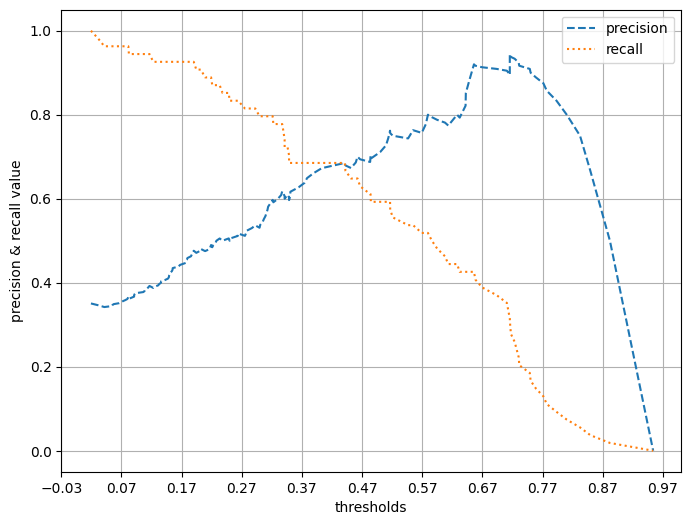

In [16]:
pred_proba = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba)

In [17]:
df.describe() # glucose가 0이 나오는게 말이 안됨

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


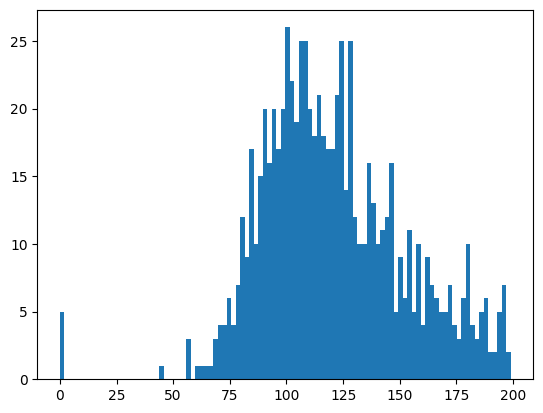

In [25]:
plt.hist(df['Glucose'],bins=100 ) # hist() 함수의 bins 파라미터는 히스토그램의 가로축 구간의 개수를 지정합니다., 0값이 5개 존재
plt.show()

In [26]:
# 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

total_count= df['Glucose'].count()

for feature in zero_features:
  zero_count=df[df[feature]==0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는{2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는0.65%
BloodPressure 0 건수는 35, 퍼센트는4.56%
SkinThickness 0 건수는 227, 퍼센트는29.56%
Insulin 0 건수는 374, 퍼센트는48.70%
BMI 0 건수는 11, 퍼센트는1.43%


In [19]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [28]:
mean_zero_features = df[zero_features].mean()
df[zero_features]=df[zero_features].replace(0,mean_zero_features)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [34]:
df[feature]==0

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BMI, Length: 768, dtype: bool

In [32]:
df[df[feature]==0][feature].count()

0

In [31]:
# 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

total_count= df['Glucose'].count()

for feature in zero_features:
  zero_count=df[df[feature]==0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는{2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 0, 퍼센트는0.00%
BloodPressure 0 건수는 0, 퍼센트는0.00%
SkinThickness 0 건수는 0, 퍼센트는0.00%
Insulin 0 건수는 0, 퍼센트는0.00%
BMI 0 건수는 0, 퍼센트는0.00%


In [40]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=156,stratify=y)


lc_clf=LogisticRegression()
lc_clf.fit(X_train,y_train)
pred=lc_clf.predict(X_test)

pred_proba=lc_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred)

오차행렬:
 [[90 10]
 [21 33]]

정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804
AUC: 0.7556


In [21]:
xgb_clf = xgb.XGBClassifier(
    random_state=11,
    learning_rate=0.1,  # 학습률
    n_estimators=100,  # 트리의 개수
    max_depth=6,  # 트리의 최대 깊이
    min_child_weight=1,  # 리프 노드에 필요한 최소 가중치 합
    gamma=0,  # 트리의 리프 노드에서 필요한 최소 손실 감소
    subsample=1,  # 각 트리를 학습하는 데 사용되는 데이터의 일부분 비율
    colsample_bytree=1,  # 각 트리를 학습하는 데 사용되는 피처의 일부분 비율
    objective='binary:logistic'  # 목적 함수(분류 문제의 경우 'binary:logistic' 사용)
)

In [22]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=11, ...)

오차행렬:
 [[79 21]
 [21 33]]

정확도: 0.7273
정밀도: 0.6111
재현율: 0.6111
F1: 0.6111
AUC: 0.7006


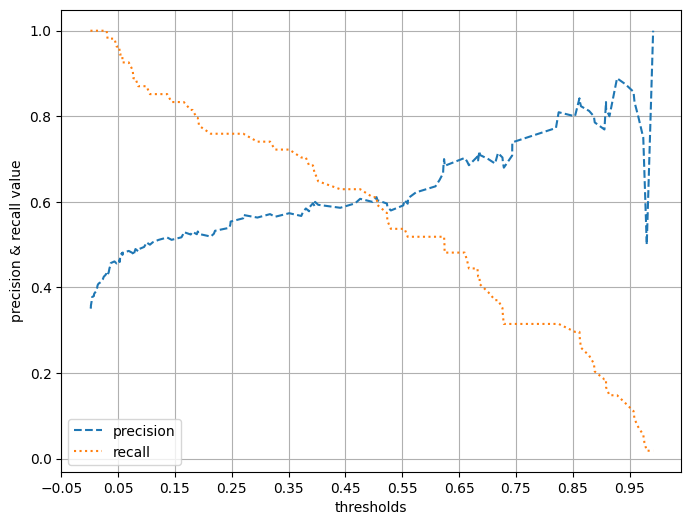

In [23]:
xgb_clf.fit(X_train,y_train)
pred= xgb_clf.predict(X_test)

get_clf_eval(y_test,pred)

pred_proba = xgb_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba)